<a href="https://colab.research.google.com/github/PadmajaVB/Sexist-Statement-Detection/blob/main/Build_sexist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import re

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
benevolent_data_path = '/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/Benevolent_sexism.csv'
sexist_comment_data_path = '/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/everyday_sexist_comment.csv'
reddit_data_path = '/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/reddit (1).csv'
isep_data_path = '/content/drive/MyDrive/UnivAI/AI-3 Project/data/ISEP Sexist Data labeling.xlsx'

In [85]:
original_data = pd.read_excel(isep_data_path) 

In [86]:
original_data.head()

,Sentences,Label
0,"For a woman, that is good",1
1,Just dress sexy and you will sign any contract.,1
2,Are you having period ?,1
3,Stop being bitchy,1
4,I leave early because of her children instead ...,1


In [87]:
X = original_data[['Sentences']]
y = original_data['Label']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=66, shuffle=True)

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7, stratify=y_train, random_state=66, shuffle=True)

In [90]:
X_train.head()

,Sentences
903,People who work sitting down get paid more tha...
229,Real women don't go along with a day without w...
492,"If a man marries a good woman, he will have a ..."
741,Women are reckless drivers.
588,Women comedians suck


In [91]:
train_data = X_train.copy()
train_data['Label'] = y_train

In [92]:
test_data = X_test.copy()
test_data['Label'] = y_test

In [93]:
val_data = X_val.copy()
val_data['Label'] = y_val

In [94]:
benevolent_df = pd.read_csv(benevolent_data_path)

In [95]:
benevolent_df.head()

,Unnamed: 0,1
0,0,"Happy #womensday to all my sassy women, classy..."
1,1,The lights are out at the Statue of Liberty......
2,2,We can’t achieve any of our goals without the ...
3,3,"""she parties like a man but loves like a woman"""
4,4,Lucky is the man who is the first love of a wo...


In [96]:
new_benevolent_df = benevolent_df[["1"]]
new_benevolent_df['Label'] = 1

In [97]:
new_benevolent_df.rename(columns={'1': 'Sentences'}, inplace=True)

In [98]:
new_benevolent_df.head()

,Sentences,Label
0,"Happy #womensday to all my sassy women, classy...",1
1,The lights are out at the Statue of Liberty......,1
2,We can’t achieve any of our goals without the ...,1
3,"""she parties like a man but loves like a woman""",1
4,Lucky is the man who is the first love of a wo...,1


In [99]:
sexist_comment_df = pd.read_csv(sexist_comment_data_path)

In [100]:
new_sexist_comment_df = sexist_comment_df[['Sentences','Label']]

In [101]:
new_sexist_comment_df.head()

,Sentences,Label
0,"My cousin (female, and 14 years older than me)...",1
1,While I was working at McDonald's there was th...,1
2,I told multiple supervisors and the head of th...,1
3,I worked as a Project Engineer at a major comp...,1
4,"I wanted to go in the forces and was told ""Wom...",1


In [102]:
reddit_df = pd.read_csv(reddit_data_path)

In [103]:
new_reddit_df = reddit_df[['body','Sexism']]
new_reddit_df.rename(columns={'body':'Sentences','Sexism':'Label'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [104]:
new_reddit_df.head()

,Sentences,Label
0,"Damn, I saw a movie in which the old woman bat...",1
1,I would not say that by women getting rights i...,0
2,"I'm sorry, does women having rights mean that ...",0
3,> The problem is that they removed the urinals...,1
4,But using the urinals in front of girls that a...,1


In [105]:
sexist_data = pd.concat([new_benevolent_df, new_sexist_comment_df, new_reddit_df, train_data], axis=0)

In [106]:
def clean_data(df):
  df.Sentences = [element.lower() for element in df.Sentences]
  df.Sentences = [re.sub(r'[^a-zA-Z /n]', '', element) for element in df.Sentences]
  # df.Sentences = ['<s> '+ element + ' </s>' for element in df.Sentences]
  return df

In [107]:
df = clean_data(sexist_data)
test_data = clean_data(test_data)
val_data = clean_data(val_data)

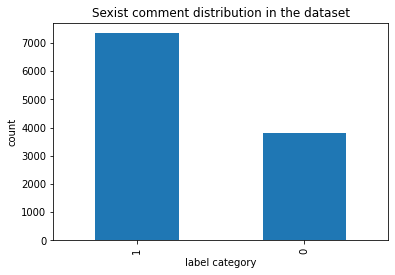

In [108]:
df['Label'].value_counts().plot(kind='bar')
plt.xlabel('label category')
plt.ylabel('count')
plt.title('Sexist comment distribution in the dataset')
plt.show()

In [109]:
df.head()

,Sentences,Label
0,happy womensday to all my sassy women classy w...,1
1,the lights are out at the statue of libertytha...,1
2,we cant achieve any of our goals without the p...,1
3,she parties like a man but loves like a woman,1
4,lucky is the man who is the first love of a wo...,1


In [110]:
df.to_csv('/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/train_dataset.csv')

In [111]:
test_data.to_csv('/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/test_dataset.csv')
val_data.to_csv('/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/val_dataset.csv')